In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from math import pi, sin, radians
from xgcm import Grid
from scipy import integrate

In [2]:
def f(t_p):
    return((t_p -2020)/10)

In [3]:
def f(t_p): 
    return raw_data.interp(t_p)

In [4]:
def G(t, t_p, τ):
    'where G(t-t_p) such that t-t_p = s), if s<0, the function goes to 0'
    s = t-t_p
    if s >= 0:
        G = np.exp(-s/τ)
    elif s<0:
        G = np.nan
        
    return(G)

In [5]:
def G_f(t, t_p, τ, dt):
    'where C(t) = int[G(t-t_p)f(t_p)]dt and t_p is the midpoint of the integral (eg: if integrating from 2020-2030, it is dt/2 away from 2020)'
    return(G(t, t_p, τ)*f(t_p)*dt)

In [6]:
def C(t, t_range, τ, dt):
    t_p_range = t_range-dt/2
    return(np.cumsum(G_f(t, t_p_range[i], τ, dt)))

In [7]:
#modify these for different lifetimes and range of years of interest and timestep
τ = 20
dt = 10
t_range = np.arange(2030,2061)
t_p_range = t_range-dt/2

In [10]:
np.arange(0, int(len(t_p_range)/dt))*dt

array([ 0, 10, 20])

In [16]:
C_df = pd.DataFrame(columns = np.arange(0, int(len(t_p_range)/dt))*dt, index = t_range)
for i in np.arange(0, int(len(t_p_range)/dt))*dt:
    for t in t_range:
        C_df[i].loc[t] = C(t, t_range, τ, dt)

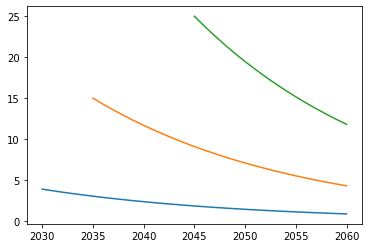

In [17]:
plt.plot(C_df)